<a href="https://colab.research.google.com/github/bhupeshmahara/employee-retention-prediction/blob/main/Employee_Retention_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Table of Contents**
---

**1.** [**Problem Statement**](#Section1)<br>
**2.** [**Data Description**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)<br>
  - **3.2** [**Importing Libraries**](#Section32)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-Profiling**](#Section5)<br>
**6.** [**Data Pre-Processing**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
**9.** [**Data Processing & Feature Selection**](#Section9)<br>
  - **9.1** [**Data Encoding**](#Section91)<br>
  - **9.2** [**Data Preparation**](#Section92)<br>
  - **9.3** [**Data Scaling**](#Section93)<br>

**10.** [**Model Development & Evaluation**](#Section10)<br>
  - **10.1** [**Logistic Regression**](#Section101)<br>
  - **10.2** [**Decistion Tree Classifier**](#Section102)<br>
  - **10.3** [**Random Forest Classifier**](#Section103)<br>
  - **10.4** [**KNN Classifier**](#Section104)<br>
  - **10.5** [**Naive Bayes Classifier**](#Section105)<br>
  - **10.6** [**Gradient Boosting Classifier**](#Section106)<br>
  - **10.7** [**XGBoost Classifier Classifier**](#Section107)<br>
  - **10.8** [**AdaBoost Classifier**](#Section108)<br>

**11.** [**Modelling using Cross-Validation**](#Section11)<br>
  - **11.1** [**Declare Hyper-paramter to tune the model**](#Section11.1)<br>

**12.** [**Predicting for Unknown Data**](#Section12)<br>
  - **12.1** [**Data Description**](#Section12.1)<br>
  - **12.2** [**Data Encoding**](#Section12.2)<br>
  - **12.3** [**Run the model through given data**](#Section12.3)<br>
  - **12.4** [**Publish the report**](#Section12.4)<br>
---

<center><h1><b>EMPLOYEE RETENTION PREDICTION</b></h1></center>


---
<a name = Section1></a>
# **2. Problem Statement**
---

Predict whether or not an employee would stay given the data of employees at a company.

Your client for this project is the HR Department at a software company.

    They want to try a new initiative to retain employees.
    The idea is to use data to predict whether an employee is likely to leave.
    Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
    They only want to deal with the data that is related to permanent employees.

Current Practice
Once an employee leaves, he or she is taken an interview with the name "exit interview" and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.

This suffers from the following problems:

    This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
    The second problem is these insights can't be aggregated and interlaced across all employees who have left.
    The third is that it is too late by the time the proposed policy changes take effect.

The HR department has hired you as data science consultants. They want to supplement their exit interviews with a more proactive approach.


#### Your Role

    You are given datasets of past employees and their status (still employed or already left).
    Your task is to build a classification model using the datasets.
    Because there was no machine learning model for this problem in the company, you don’t have quantifiable win condition. 
    You need to build the best possible model.

---
<a name = Section2></a>
# **2. Data Description**
---

The Business Intelligence Analysts of the Company provided you three datasets that contain information about past employees and their status (still employed or already left).

    department_data

    This dataset contains information about each department. The schema of the dataset is as follows:
        dept_id – Unique Department Code
        dept_name – Name of the Department
        dept_head – Name of the Head of the Department

    employee_details_data

    This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:
        employee_id – Unique ID Number for each employee
        age – Age of the employee
        gender – Gender of the employee
        marital_status – Marital Status of the employee

    employee_data

    This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

    Target variable
        status – Current employment status (Employed / Left)

    Administrative information
        department – Department to which the employees belong(ed) to
        salary – Salary level with respect to rest of their department
        tenure – Number of years at the company
        recently_promoted – Was the employee promoted in the last 3 years?
        employee_id – Unique ID Number for each employee

    Workload information
        n_projects – Number of projects employee has worked on
        avg_monthly_hrs – Average number of hours worked per month

    Mutual evaluation information
        satisfaction – Score for employee’s satisfaction with the company (higher is better)
        last_evaluation – Score for most recent evaluation of employee (higher is better)
        filed_complaint – Has the employee filed a formal complaint in the last 3 years?


---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

---
<a name = Section31></a>
### **3.1 Installing Libraries**
---

In [1]:
!pip install mysql-connector-python
!pip install pandas-profiling

     |████████████████████████████████| 25.2 MB 56.5 MB/s 


In [2]:
# Database 
import mysql.connector
from mysql.connector import Error
from collections import Counter

Download the dataSets onto Python by connecting to the below provided MySQL instance.
                      
    host        'cpanel.insaid.co'
    user 	   'student'
    passwd      'student'
    database    'Capstone2'

---
<a name = Section32></a>
### **3.2 Importing Libraries**
---

In [3]:
!pip install scikit-learn

In [4]:
!pip install xgboost

In [5]:
# import basic libraries

import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

# import the required libraries from sklearn

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# import plotting libraries

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [6]:
try:
    mySQLconnection = mysql.connector.connect(host='cpanel.insaid.co',
                             database='Capstone2',
                             user='student',
                             password='student')
    
    if mySQLconnection.is_connected():
        db_Info = mySQLconnection.get_server_info()
        print("Connected to MySQL database... MySQL Server version on ",db_Info)
        cursor = mySQLconnection.cursor()
        cursor.execute("select database();")
        database = cursor.fetchone()
        print ("Your connected to - ", database)
        
        sql_select_Query = "select * from department_data"
        SQL_Query = pd.read_sql_query(sql_select_Query, mySQLconnection)
        df_departmentData = pd.DataFrame(SQL_Query)
        
        sql_select_Query = "select * from employee_details_data"
        SQL_Query = pd.read_sql_query(sql_select_Query, mySQLconnection)
        df_employeeDetailsData = pd.DataFrame(SQL_Query)

        sql_select_Query = "select * from employee_data"
        SQL_Query = pd.read_sql_query(sql_select_Query, mySQLconnection)
        df_employeeData = pd.DataFrame(SQL_Query)

except Error as e :
    print ("Error while connecting to MySQL", e)
    
finally:
    #closing database connection.
    if(mySQLconnection .is_connected()):
        mySQLconnection.close()
        print("MySQL connection is closed")

Connected to MySQL database... MySQL Server version on  8.0.29
Your connected to -  ('Capstone2',)
MySQL connection is closed


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

In [7]:
df_departmentData.to_csv('department_data_sql.csv')
print (df_departmentData.shape)
df_employeeDetailsData.to_csv('employee_details_data_sql.csv')
print (df_employeeDetailsData.shape)
df_employeeData.to_csv('employee_data_sql.csv')
print (df_employeeData.shape)

(11, 3)
(14245, 4)
(14150, 11)


In [8]:
df_departmentData.head()

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


In [9]:
df_employeeDetailsData.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [10]:
df_employeeData.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


<a name = Section41></a>
### **4.1 Data Description**

In [11]:
df_departmentData.describe()

,dept_id,dept_name,dept_head
count,11,11,11
unique,11,11,11
top,D00-IT,IT,Henry Adey
freq,1,1,1


In [12]:
df_employeeDetailsData.describe()

,employee_id,age
count,14245.000000,14245.000000
mean,112123.050544,32.889926
std,8500.457343,9.970834
min,100101.000000,22.000000
25%,105775.000000,24.000000
50%,111298.000000,29.000000
75%,116658.000000,41.000000
max,148988.000000,57.000000


In [13]:
df_employeeData.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
count,14150.000000,2046.0,12663.000000,14150.000000,297.0,14000.000000,14000.000000,14150.000000
mean,199.994346,1.0,0.718399,3.778304,1.0,0.621212,3.499357,112080.750247
std,50.833697,0.0,0.173108,1.250162,0.0,0.250482,1.462584,8748.202856
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000,0.000000
25%,155.000000,1.0,0.563711,3.000000,1.0,0.450356,3.000000,105772.500000
50%,199.000000,1.0,0.724731,4.000000,1.0,0.652394,3.000000,111291.500000
75%,245.000000,1.0,0.871409,5.000000,1.0,0.824925,4.000000,116650.750000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000,148988.000000


<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of the features**.

In [14]:
df_departmentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [15]:
df_employeeDetailsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [16]:
df_employeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

In [17]:
# profile_deptData = ProfileReport(df_departmentData)
# profile_deptData.to_file(output_file = "Department Profiling Report.html")
# print("Accomplished")

In [18]:
# profile_emp_DetailsData = ProfileReport(df_employeeDetailsData)
# profile_emp_DetailsData.to_file(output_file = "Employee Details Data Profiling Report.html")
# print("Accomplished")

In [19]:
# profile_emp_Data = ProfileReport(df_employeeData)
# profile_emp_Data.to_file(output_file = "Employee Data Profiling Report.html")
# print("Accomplished")

---
<a name = Section6></a>
# **6. Data Pre-processing**
---

In [20]:
# for department dataset

df_departmentData.isnull().sum()

dept_id      0
dept_name    0
dept_head    0
dtype: int64

In [21]:
# for employeesDetailsData dataset

df_employeeDetailsData.isnull().sum()

employee_id       0
age               0
gender            0
marital_status    0
dtype: int64

In [22]:
# for employeeData dataset

df_employeeData[df_employeeData['employee_id']<=0]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
34,284.0,D00-SS,NaN,0.852702,6,NaN,low,0.069168,Left,4.0,0
304,264.0,D00-ENG,NaN,0.774554,6,NaN,low,0.110974,Left,4.0,0
1234,129.0,D00-SP,NaN,0.402660,2,NaN,medium,0.437359,Left,3.0,0
11304,167.0,None,NaN,0.880053,5,NaN,low,0.682140,Employed,3.0,0
12304,259.0,D00-ENG,NaN,0.505883,5,NaN,low,0.631046,Employed,4.0,0


In [23]:
# from df_employeeData.describe() we can see that minimum employee Id is 0 that means there are such records with an invalid employee id.
# remove the records with employee Id=0, since there are only 5 records

df_employeeData.drop(df_employeeData[df_employeeData['employee_id']<=0].index, inplace=True)
df_employeeData.shape

(14145, 11)

In [24]:
# check for null values in employeeData dataset

df_employeeData.isnull().sum().sort_values(ascending=False)

recently_promoted    13848
filed_complaint      12099
last_evaluation       1487
department             706
satisfaction           150
tenure                 150
avg_monthly_hrs          0
n_projects               0
salary                   0
status                   0
employee_id              0
dtype: int64

__Here we can see that features like "recently_promoted" and "filed_complaint" are having a lot of missing values, so we'll drop both the columns__

In [25]:
df_employeeData.drop(['filed_complaint', 'recently_promoted'], axis=1, inplace = True)
df_employeeData.isnull().sum().sort_values(ascending=False)

last_evaluation    1487
department          706
satisfaction        150
tenure              150
avg_monthly_hrs       0
n_projects            0
salary                0
status                0
employee_id           0
dtype: int64

In [26]:
# we have an invalid value as "-IT" in department column

df_employeeData['department'].unique()

array([None, 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN', '-IT'],
      dtype=object)

In [27]:
# replace the incorrect Data "-IT" with "D00-IT". This is very important to avoid invalid elements during the merge.

df_employeeData['department'].replace({'-IT': 'D00-IT'}, inplace=True)
df_employeeData['department'].unique()

array([None, 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN'], dtype=object)

In [28]:
df_employeeData.isnull().sum().sort_values(ascending=False)

last_evaluation    1487
department          706
satisfaction        150
tenure              150
avg_monthly_hrs       0
n_projects            0
salary                0
status                0
employee_id           0
dtype: int64

### __Now we'll merge the data of all three datasets into one final dataset__

In [29]:
df_employeeDetails = pd.merge(df_employeeDetailsData, df_employeeData, on='employee_id', how='inner')
df_employeeDetails.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure
0,113558,43,Male,Married,111.0,D00-PR,0.753977,5,medium,0.921208,Employed,4.0
1,112256,24,Female,Unmarried,201.0,D00-MN,0.964453,3,medium,0.568479,Employed,3.0
2,112586,22,Female,Unmarried,239.0,D00-SS,0.756458,3,low,0.144812,Employed,6.0
3,108071,36,Male,Married,151.0,D00-PR,0.608282,5,medium,0.210300,Employed,6.0
4,116915,38,Male,Married,259.0,D00-IT,0.749206,4,medium,0.888514,Employed,3.0


In [30]:
df_final = pd.merge(df_employeeDetails, df_departmentData, left_on='department', right_on='dept_id', how='inner')
df_final.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure,dept_id,dept_name,dept_head
0,113558,43,Male,Married,111.0,D00-PR,0.753977,5,medium,0.921208,Employed,4.0,D00-PR,Procurement,Louie Viles
1,108071,36,Male,Married,151.0,D00-PR,0.608282,5,medium,0.210300,Employed,6.0,D00-PR,Procurement,Louie Viles
2,110888,42,Male,Married,152.0,D00-PR,0.673508,6,medium,0.720369,Employed,3.0,D00-PR,Procurement,Louie Viles
3,115694,26,Male,Unmarried,167.0,D00-PR,0.874656,3,medium,0.575996,Employed,4.0,D00-PR,Procurement,Louie Viles
4,107767,43,Male,Married,174.0,D00-PR,0.634783,5,medium,0.208138,Employed,5.0,D00-PR,Procurement,Louie Viles


In [31]:
df_final.shape

(13439, 15)

In [32]:
df_final.describe()

,employee_id,age,avg_monthly_hrs,last_evaluation,n_projects,satisfaction,tenure
count,13439.000000,13439.000000,13439.000000,12018.000000,13439.000000,13289.000000,13289.000000
mean,112115.324801,32.934593,200.039140,0.718452,3.783466,0.622181,3.506208
std,8489.198037,9.980176,50.844631,0.173011,1.250447,0.250428,1.475868
min,100101.000000,22.000000,49.000000,0.316175,1.000000,0.040058,2.000000
25%,105787.500000,24.000000,155.000000,0.564244,3.000000,0.451732,3.000000
50%,111299.000000,29.000000,199.000000,0.723793,4.000000,0.653898,3.000000
75%,116649.000000,41.000000,245.000000,0.871643,5.000000,0.825661,4.000000
max,148988.000000,57.000000,310.000000,1.000000,7.000000,1.000000,10.000000


In [33]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13439 entries, 0 to 13438
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employee_id      13439 non-null  int64  
 1   age              13439 non-null  int64  
 2   gender           13439 non-null  object 
 3   marital_status   13439 non-null  object 
 4   avg_monthly_hrs  13439 non-null  float64
 5   department       13439 non-null  object 
 6   last_evaluation  12018 non-null  float64
 7   n_projects       13439 non-null  int64  
 8   salary           13439 non-null  object 
 9   satisfaction     13289 non-null  float64
 10  status           13439 non-null  object 
 11  tenure           13289 non-null  float64
 12  dept_id          13439 non-null  object 
 13  dept_name        13439 non-null  object 
 14  dept_head        13439 non-null  object 
dtypes: float64(4), int64(3), object(8)
memory usage: 1.6+ MB


__We'll drop the column "department" because "department" and "dept_id are having same values"__

In [34]:
df_final.drop(['department'], axis=1, inplace = True)

In [35]:
# check the missing value percentage for the final dataset

df_final.isnull().sum().sort_values(ascending=False)*100/13232

last_evaluation    10.739117
satisfaction        1.133615
tenure              1.133615
employee_id         0.000000
age                 0.000000
gender              0.000000
marital_status      0.000000
avg_monthly_hrs     0.000000
n_projects          0.000000
salary              0.000000
status              0.000000
dept_id             0.000000
dept_name           0.000000
dept_head           0.000000
dtype: float64

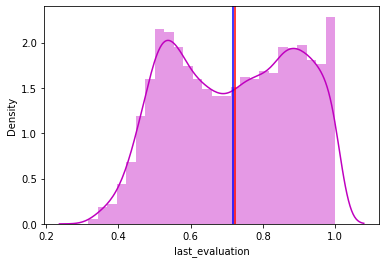

In [36]:
# Is my data normally distributed for last_evaluation column ?

sns.distplot(df_final.last_evaluation, color='m')
plt.axvline(df_final.last_evaluation.mean(), color='b')
plt.axvline(df_final.last_evaluation.median(), color='r')
plt.show()

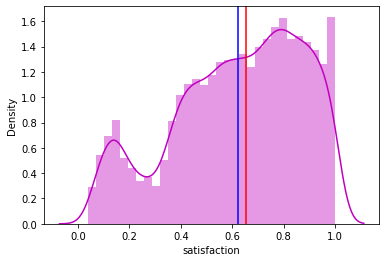

In [37]:
# Is my data normally distributed for satisfaction column ?

sns.distplot(df_final.satisfaction, color='m')
plt.axvline(df_final.satisfaction.mean(), color='b')
plt.axvline(df_final.satisfaction.median(), color='r')
plt.show()

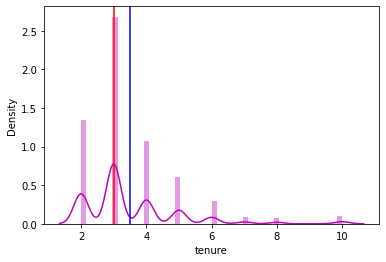

In [38]:
# Is my data normally distributed for tenure column ?

sns.distplot(df_final.tenure, color='m')
plt.axvline(df_final.tenure.mean(), color='b')
plt.axvline(df_final.tenure.median(), color='r')
plt.show()

In [39]:
# filling the missing values in "last_evaluation" by mean.
df_final.last_evaluation.fillna(df_final.last_evaluation.mean(), inplace=True)

# filling the missing values in "satisfaction" by mean.
df_final.satisfaction.fillna(df_final.satisfaction.mean(), inplace=True)

# filling the missing values in "tenure" by median.
df_final.tenure.fillna(df_final.tenure.median(), inplace=True)

df_final.shape

(13439, 14)

In [40]:
# checking for duplicate data in the final dataset

df_final[df_final.duplicated()].count()

employee_id        29
age                29
gender             29
marital_status     29
avg_monthly_hrs    29
last_evaluation    29
n_projects         29
salary             29
satisfaction       29
status             29
tenure             29
dept_id            29
dept_name          29
dept_head          29
dtype: int64

In [41]:
# drop the duplicate data

df_final.drop_duplicates(inplace = True,keep='first')
df_final.shape

(13410, 14)

In [42]:
df_final.isnull().sum().sort_values(ascending=False)

employee_id        0
age                0
gender             0
marital_status     0
avg_monthly_hrs    0
last_evaluation    0
n_projects         0
salary             0
satisfaction       0
status             0
tenure             0
dept_id            0
dept_name          0
dept_head          0
dtype: int64

## __We have removed missing, invalid and duplicate values from our dataset.__
## __OUR DATASET IS CLEAN NOW__

---
<a name = Section7></a>
# **7. Data Post-profiling**
---

In [43]:
# post_profile_deptData = ProfileReport(df_departmentData)
# post_profile_deptData.to_file(output_file = "Post Department Profiling Report.html")
# print("Accomplished")

In [44]:
# post_profile_emp_DetailsData = ProfileReport(df_employeeDetailsData)
# post_profile_emp_DetailsData.to_file(output_file = "Post Employee Details Data Profiling Report.html")
# print("Accomplished")

In [45]:
# post_profile_emp_Data = ProfileReport(df_employeeData)
# post_profile_emp_Data.to_file(output_file = "Post Employee Data Profiling Report.html")
# print("Accomplished")

In [46]:
df_final.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,last_evaluation,n_projects,salary,satisfaction,status,tenure,dept_id,dept_name,dept_head
0,113558,43,Male,Married,111.0,0.753977,5,medium,0.921208,Employed,4.0,D00-PR,Procurement,Louie Viles
1,108071,36,Male,Married,151.0,0.608282,5,medium,0.210300,Employed,6.0,D00-PR,Procurement,Louie Viles
2,110888,42,Male,Married,152.0,0.673508,6,medium,0.720369,Employed,3.0,D00-PR,Procurement,Louie Viles
3,115694,26,Male,Unmarried,167.0,0.874656,3,medium,0.575996,Employed,4.0,D00-PR,Procurement,Louie Viles
4,107767,43,Male,Married,174.0,0.634783,5,medium,0.208138,Employed,5.0,D00-PR,Procurement,Louie Viles


In [47]:
# dropping 'employee_id' , 'dept_id' , 'dept_head' features as they don't add any importance to data while performing EDA

df_final.drop(['employee_id', 'dept_id', 'dept_head'], axis=1, inplace = True)
df_final.head()

,age,gender,marital_status,avg_monthly_hrs,last_evaluation,n_projects,salary,satisfaction,status,tenure,dept_name
0,43,Male,Married,111.0,0.753977,5,medium,0.921208,Employed,4.0,Procurement
1,36,Male,Married,151.0,0.608282,5,medium,0.210300,Employed,6.0,Procurement
2,42,Male,Married,152.0,0.673508,6,medium,0.720369,Employed,3.0,Procurement
3,26,Male,Unmarried,167.0,0.874656,3,medium,0.575996,Employed,4.0,Procurement
4,43,Male,Married,174.0,0.634783,5,medium,0.208138,Employed,5.0,Procurement


---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

### __Checking the Correlation of the dataset__

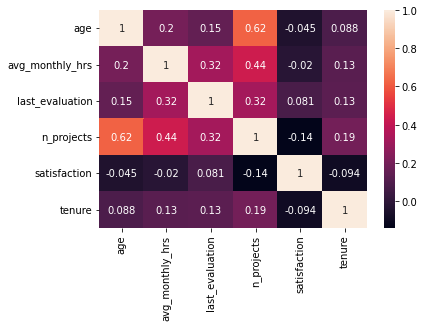

In [48]:
sns.heatmap(df_final.corr(), annot=True)
plt.show()

#### __Observations:__

> __tenure__ is highly correlated with __satisfaction__.

### __Status frequency of Employees__

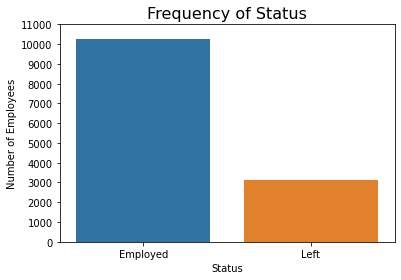

In [49]:
sns.countplot(x="status", data=df_final)
# df_final['status'].value_counts().plot.bar()
# plt.xticks(rotation=0, size=12)
plt.yticks(ticks=np.arange(0, 12000, 1000))
plt.xlabel(xlabel='Status')
plt.ylabel(ylabel='Number of Employees')
plt.title('Frequency of Status', fontsize=16)
plt.show()

#### __Observations:__


> We can see that proportion of employeed people are far more than employees who have left.

### __Gender frequency of Employees__

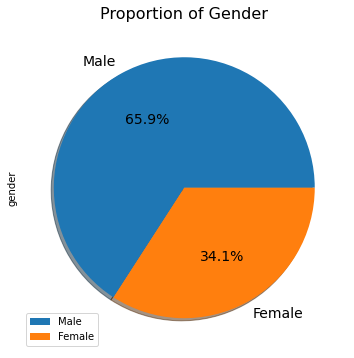

In [50]:
df_final['gender'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', figsize=(6,6), shadow=True, legend=True)
plt.title('Proportion of Gender', fontsize=16)
plt.show()

#### __Observations:__


> __Male__ dominance is more with __66%__ of total and __34%__ of __Females__ employees working in the organization.

### __Relation between Salary and Gender__

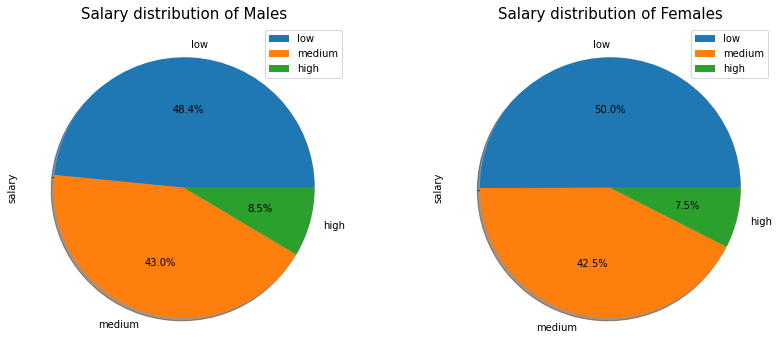

In [51]:
f, ax = plt.subplots(1,2,figsize=(14,6))
df_final['salary'][df_final['gender']=='Male'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True, legend=True)
df_final['salary'][df_final['gender']=='Female'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], shadow=True, legend=True)
ax[0].set_title('Salary distribution of Males', fontsize=15)
ax[1].set_title('Salary distribution of Females', fontsize=15)
plt.show()

#### __Observations:__

> There is no definite correlation between salary and gender, salary is independent of gender.

### __Distribution of Salary across different Departments__

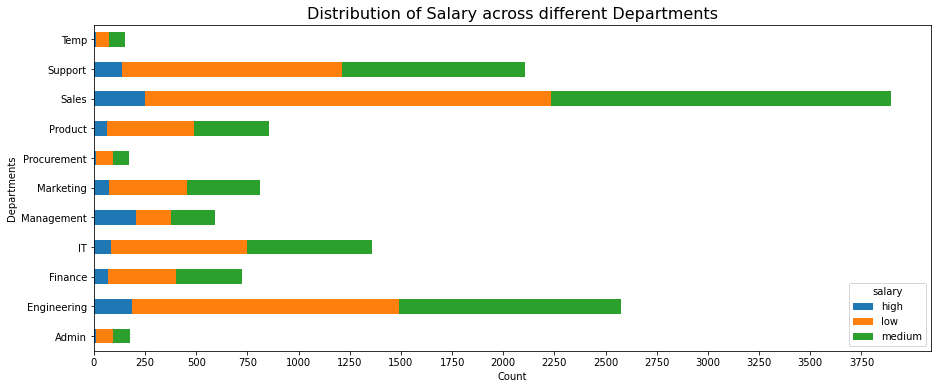

In [52]:
cross_tab = pd.crosstab(index=df_final['dept_name'], columns=df_final['salary'])
cross_tab.plot(kind='barh', stacked=True, figsize=(15, 6))
plt.xticks(ticks=np.arange(0, 4000, 250))
plt.xlabel(xlabel='Count')
plt.ylabel(ylabel='Departments')
plt.title("Distribution of Salary across different Departments", fontsize=16)
plt.show()

### __Distribution of Salary with Marital Status__

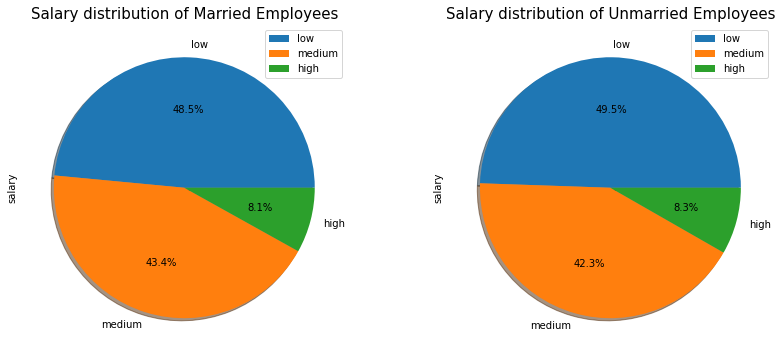

In [53]:
f, ax = plt.subplots(1,2,figsize=(14,6))
df_final['salary'][df_final['marital_status']=='Married'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True, legend=True)
df_final['salary'][df_final['marital_status']=='Unmarried'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], shadow=True, legend=True)
ax[0].set_title('Salary distribution of Married Employees', fontsize=15)
ax[1].set_title('Salary distribution of Unmarried Employees', fontsize=15)
plt.show()

In [54]:
df_final.head()

,age,gender,marital_status,avg_monthly_hrs,last_evaluation,n_projects,salary,satisfaction,status,tenure,dept_name
0,43,Male,Married,111.0,0.753977,5,medium,0.921208,Employed,4.0,Procurement
1,36,Male,Married,151.0,0.608282,5,medium,0.210300,Employed,6.0,Procurement
2,42,Male,Married,152.0,0.673508,6,medium,0.720369,Employed,3.0,Procurement
3,26,Male,Unmarried,167.0,0.874656,3,medium,0.575996,Employed,4.0,Procurement
4,43,Male,Married,174.0,0.634783,5,medium,0.208138,Employed,5.0,Procurement


---
<a name = Section9></a>
# **9. Data Processing and Feature Selection**
---

---
<a name = Section91></a>
### **9.1 Data Encoding**
---

In [55]:
CATEGORICAL_FEATURES = ["gender", "marital_status", "salary", "status", "dept_name"]

In [56]:
# label encode the cateorical features

le = LabelEncoder()

df_final['gender'] = le.fit_transform(df_final['gender'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

df_final['marital_status'] = le.fit_transform(df_final['marital_status'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

df_final['salary'] = le.fit_transform(df_final['salary'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

df_final['status'] = le.fit_transform(df_final['status'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

df_final['dept_name'] = le.fit_transform(df_final['dept_name'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)


{'Female': 0, 'Male': 1}
{'Married': 0, 'Unmarried': 1}
{'high': 0, 'low': 1, 'medium': 2}
{'Employed': 0, 'Left': 1}
{'Admin': 0, 'Engineering': 1, 'Finance': 2, 'IT': 3, 'Management': 4, 'Marketing': 5, 'Procurement': 6, 'Product': 7, 'Sales': 8, 'Support': 9, 'Temp': 10}


In [57]:
df_final.head()

,age,gender,marital_status,avg_monthly_hrs,last_evaluation,n_projects,salary,satisfaction,status,tenure,dept_name
0,43,1,0,111.0,0.753977,5,2,0.921208,0,4.0,6
1,36,1,0,151.0,0.608282,5,2,0.210300,0,6.0,6
2,42,1,0,152.0,0.673508,6,2,0.720369,0,3.0,6
3,26,1,1,167.0,0.874656,3,2,0.575996,0,4.0,6
4,43,1,0,174.0,0.634783,5,2,0.208138,0,5.0,6


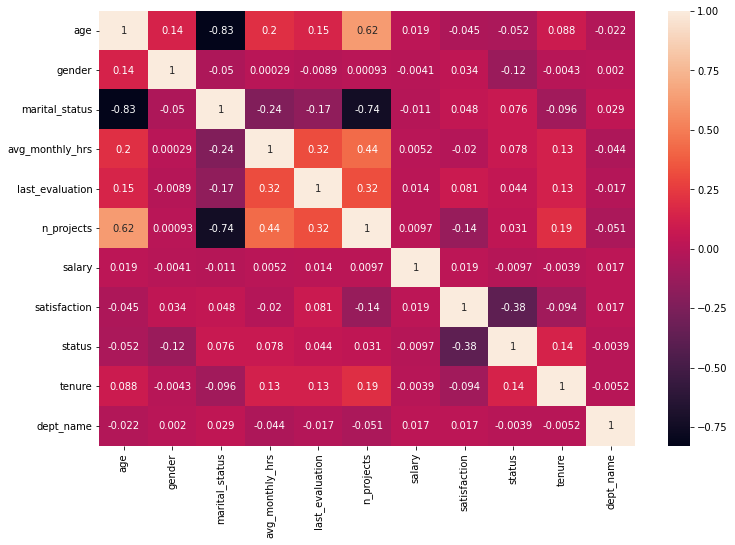

In [58]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_final.corr(), annot=True)
plt.show()


#### __Observations:__

> __marital_status__ is highly correlated to __age__ and __n_projects__.

In [59]:
df_final.head()

,age,gender,marital_status,avg_monthly_hrs,last_evaluation,n_projects,salary,satisfaction,status,tenure,dept_name
0,43,1,0,111.0,0.753977,5,2,0.921208,0,4.0,6
1,36,1,0,151.0,0.608282,5,2,0.210300,0,6.0,6
2,42,1,0,152.0,0.673508,6,2,0.720369,0,3.0,6
3,26,1,1,167.0,0.874656,3,2,0.575996,0,4.0,6
4,43,1,0,174.0,0.634783,5,2,0.208138,0,5.0,6


In [60]:
df_final.shape

(13410, 11)

---
<a name = Section92></a>
### **9.2 Data Preparation**
---

In [61]:
# train test split

X = df_final[['avg_monthly_hrs', 'last_evaluation', 'n_projects', 'salary', 'satisfaction', 'tenure', 'age', 'gender', 'marital_status', 'dept_name']]
y = df_final.status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)


Train cases as below
X_train shape:  (10728, 10)
y_train shape:  (10728,)

Test cases as below
X_test shape:  (2682, 10)
y_test shape:  (2682,)


---
<a name = Section93></a>
### **9.3 Data Scaling**
---

In [62]:
# Standard Scaling before modelling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---
<a name = Section10></a>
# **10. Model Devlopment and Evaluation**
---

Since this is a classification problem, we would build the below models and compare them for efficiency.

> 1. Logistics Regression
> 2. Decision Tree Clasifier
> 3. Random Forest Classifier
> 4. KNN Classifier
> 5. Naive Bayes Classifier
> 6. Gradient Boosting Classifier
> 7. XGBoost Classifier
> 8. AdaBoost Classifier










---
<a name = Section101></a>
### **10.1 Logistic Regression**
---

In [63]:
# create object for Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# predict on X_train and X_test

y_pred_test = logreg.predict(X_test)

# classification report

print('Classification Report for Logistic Regresion\n\n', classification_report(y_test,y_pred_test))

# Accuracy score

logreg_ac = accuracy_score(y_test, y_pred_test)*100
print('Accuracy is :', logreg_ac)

Classification Report for Logistic Regresion

               precision    recall  f1-score   support

           0       0.81      0.93      0.87      2059
           1       0.56      0.30      0.39       623

    accuracy                           0.78      2682
   macro avg       0.69      0.62      0.63      2682
weighted avg       0.76      0.78      0.76      2682

Accuracy is : 78.29977628635348


---
<a name = Section102></a>
### **10.2 Decision Tree Classifier**
---

In [64]:
# create object for Decision Tree Clasifier

dt_clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=22, min_samples_split=2, random_state=42, splitter='best')
dt_clf.fit(X_train, y_train)

y_pred_test1 = dt_clf.predict(X_test)

# Classification Report

print('Classification Report for Decision Tree\n\n', classification_report(y_test, y_pred_test1))

# Accuracy score

dt_clf_accuracy = accuracy_score(y_test, y_pred_test1)*100
print('Accuracy is :', dt_clf_accuracy)


Classification Report for Decision Tree

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2059
           1       0.96      0.88      0.92       623

    accuracy                           0.97      2682
   macro avg       0.96      0.94      0.95      2682
weighted avg       0.97      0.97      0.96      2682

Accuracy is : 96.53243847874721


---
<a name = Section103></a>
### **10.3 Random Forest Classifier**
---

In [65]:
# create object for Random Forest Clasifier

rf_clf = RandomForestClassifier(criterion='entropy', max_features='auto', n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_test2 = rf_clf.predict(X_test)

# Classification Report

print('Classification Report for Random Forest\n\n', classification_report(y_test, y_pred_test2))

# Accuracy score

rf_clf_accuracy = accuracy_score(y_test, y_pred_test2)*100
print('Accuracy is :', rf_clf_accuracy)


Classification Report for Random Forest

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2059
           1       0.98      0.92      0.95       623

    accuracy                           0.98      2682
   macro avg       0.98      0.96      0.97      2682
weighted avg       0.98      0.98      0.98      2682

Accuracy is : 97.91200596569725


---
<a name = Section104></a>
### **10.4 KNN Classifier**
---

In [66]:
# create object of KNN Clasifier

knn_clf = KNeighborsClassifier(n_neighbors=5, algorithm='auto', leaf_size=30, metric='manhattan', n_jobs=-1)
knn_clf.fit(X_train, y_train)

y_pred_test3 = knn_clf.predict(X_test)

# Classification Report

print('Classification Report for KNN\n\n', classification_report(y_test, y_pred_test3))

# Accuracy Score

knn_clf_accuracy = accuracy_score(y_test, y_pred_test3)*100
print('Accuracy is :', knn_clf_accuracy)


Classification Report for KNN

               precision    recall  f1-score   support

           0       0.98      0.96      0.97      2059
           1       0.87      0.92      0.90       623

    accuracy                           0.95      2682
   macro avg       0.93      0.94      0.93      2682
weighted avg       0.95      0.95      0.95      2682

Accuracy is : 95.07829977628636


---
<a name = Section105></a>
### **10.5 Naive Bayes Classifier**
---

In [67]:
# create object of Naive Bayes Classifier

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

y_pred_test4 = gnb_clf.predict(X_test)

# Classification Report

print('Classification Report for Naive Bayes\n\n', classification_report(y_test, y_pred_test4))

# Accuracy Score

gnb_clf_accuracy = accuracy_score(y_test, y_pred_test4)*100
print('Accuracy is :', gnb_clf_accuracy)


Classification Report for Naive Bayes

               precision    recall  f1-score   support

           0       0.86      0.93      0.90      2059
           1       0.69      0.50      0.58       623

    accuracy                           0.83      2682
   macro avg       0.78      0.72      0.74      2682
weighted avg       0.82      0.83      0.82      2682

Accuracy is : 83.22147651006712


---
<a name = Section106></a>
### **10.6 Gradient Boosting Classifier**
---

In [68]:
# create object of Gradient Boosting Clasifier

gb_clf = GradientBoostingClassifier(n_estimators=200, criterion='friedman_mse', max_depth=8, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

y_pred_test5 = gb_clf.predict(X_test)

# Classification Report

print('Classification Report for Gradient Boosting\n\n', classification_report(y_test, y_pred_test5))

# Accuracy Score

gb_clf_accuracy = accuracy_score(y_test, y_pred_test5)*100
print('Accuracy is :', gb_clf_accuracy)


Classification Report for Gradient Boosting

               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2059
           1       0.97      0.94      0.95       623

    accuracy                           0.98      2682
   macro avg       0.98      0.96      0.97      2682
weighted avg       0.98      0.98      0.98      2682

Accuracy is : 97.87472035794184


---
<a name = Section107></a>
### **10.7 XGBoost Classifier**
---

In [69]:
# create object of XGBoost Clasifier

xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', learning_rate=0.1, max_depth=3, n_estimators=200,
                        n_jobs=-1, objective='binary:logistic', random_state=42)

xgb_clf.fit(X_train, y_train)

y_pred_test6 = xgb_clf.predict(X_test)

# Classification Report

print('Classification Report for XGBoost\n\n', classification_report(y_test, y_pred_test6))

# Accuracy Score

xgb_clf_accuracy = accuracy_score(y_test, y_pred_test6)*100
print('Accuracy is :', xgb_clf_accuracy)


Classification Report for XGBoost

               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2059
           1       0.96      0.93      0.94       623

    accuracy                           0.97      2682
   macro avg       0.97      0.96      0.96      2682
weighted avg       0.97      0.97      0.97      2682

Accuracy is : 97.46457867263236


---
<a name = Section108></a>
### **10.8 AdaBoost Classifier**
---

In [70]:
# create object of AdaBoost Clasifier

adb_clf = AdaBoostClassifier(n_estimators=300, learning_rate=0.1, algorithm='SAMME', random_state=42)
adb_clf.fit(X_train, y_train)

y_pred_test7 = adb_clf.predict(X_test)

# Classification Report

print('Classification Report for AdaBoost\n\n', classification_report(y_test, y_pred_test7))

# Accuracy Score

adb_clf_accuracy = accuracy_score(y_test, y_pred_test7)*100
print('Accuracy is :', adb_clf_accuracy)


Classification Report for AdaBoost

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2059
           1       0.83      0.64      0.72       623

    accuracy                           0.89      2682
   macro avg       0.86      0.80      0.83      2682
weighted avg       0.88      0.89      0.88      2682

Accuracy is : 88.59060402684564


### __Comapring Accuracy's__

In [71]:
print('Accuracy of Logistic Regression without cross-val is :', logreg_ac)
print('Accuracy of Decision Tree Classifier without cross-val is :', dt_clf_accuracy)
print('Accuracy of Random Forest Classifier without cross-val is :', rf_clf_accuracy)
print('Accuracy of KNN Classifier without cross-val is :', knn_clf_accuracy)
print('Accuracy of Naiye Bayes Classifier without cross-val is :', gnb_clf_accuracy)
print('Accuracy of Gradient Boosting Classifier without cross-val is :', gb_clf_accuracy)
print('Accuracy of XGBoost Classifier without cross-val is :', xgb_clf_accuracy)
print('Accuracy of AdaBoost Classifier without cross-val is :', adb_clf_accuracy)

Accuracy of Logistic Regression without cross-val is : 78.29977628635348
Accuracy of Decision Tree Classifier without cross-val is : 96.53243847874721
Accuracy of Random Forest Classifier without cross-val is : 97.91200596569725
Accuracy of KNN Classifier without cross-val is : 95.07829977628636
Accuracy of Naiye Bayes Classifier without cross-val is : 83.22147651006712
Accuracy of Gradient Boosting Classifier without cross-val is : 97.87472035794184
Accuracy of XGBoost Classifier without cross-val is : 97.46457867263236
Accuracy of AdaBoost Classifier without cross-val is : 88.59060402684564


---
<a name = Section11></a>
# **11. Modelling using Cross-Validation**
---

In [72]:
# Logistic Regression
scores1 = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores1.mean()

0.7820283370618941

In [73]:
# Decision Tree Clasifier
scores2 = cross_val_score(dt_clf, X, y, cv=10, scoring='accuracy') 
scores2.mean()

0.9648023862788964

In [74]:
# Random Forest Classifier
scores3 = cross_val_score(rf_clf, X, y, cv=10, scoring='accuracy') 
scores3.mean()

0.9759134973900074

In [75]:
# KNN Classifier
scores4 = cross_val_score(knn_clf, X, y, cv=10, scoring='accuracy') 
scores4.mean()

0.9149888143176733

In [76]:
# Naive Bayes Classifier
scores5 = cross_val_score(gnb_clf, X, y, cv=10, scoring='accuracy') 
scores5.mean()

0.8233407904548844

In [77]:
# Gradient Boosting Classifier
scores6 = cross_val_score(gb_clf, X, y, cv=10, scoring='accuracy') 
scores6.mean()

0.9777032065622671

In [78]:
# XGBoost Classifier
scores7 = cross_val_score(xgb_clf, X, y, cv=10, scoring='accuracy') 
scores7.mean()

0.9711409395973154

In [79]:
# AdaBoost Classifier
scores8 = cross_val_score(adb_clf, X, y, cv=10, scoring='accuracy') 
scores8.mean()

0.8826994780014914

### __Comapring Accuracy's__

In [80]:
print('Accuracy of Logistic Regression using cross validation : ', scores1.mean()*100)
print('Accuracy of Decistion Tree using cross validation : ', scores2.mean()*100)
print('Accuracy of Random Forest using cross validation : ', scores3.mean()*100)
print('Accuracy of KNN using cross validation : ', scores4.mean()*100)
print('Accuracy of Naive Bayes using cross validation : ', scores5.mean()*100)
print('Accuracy of Gradient Boosting using cross validation : ', scores6.mean()*100)
print('Accuracy of XGBoost using cross validation : ', scores7.mean()*100)
print('Accuracy of AdaBoost using cross validation : ', scores8.mean()*100)


Accuracy of Logistic Regression using cross validation :  78.20283370618941
Accuracy of Decistion Tree using cross validation :  96.48023862788963
Accuracy of Random Forest using cross validation :  97.59134973900075
Accuracy of KNN using cross validation :  91.49888143176733
Accuracy of Naive Bayes using cross validation :  82.33407904548844
Accuracy of Gradient Boosting using cross validation :  97.7703206562267
Accuracy of XGBoost using cross validation :  97.11409395973153
Accuracy of AdaBoost using cross validation :  88.26994780014914


### __Comparison Table__

| Sr no.| Model | Accuracy score with Cross-Val | Accuracy score without Cross-Val |
| - | - | - | - |
| 1. | Logistic Regression  | 78.20283370618941 | 78.29977628635348 |
| 2. | Decision Tree Clasifier | 96.48023862788963 | 96.53243847874721 |
| 3. | Random Forest Classifier | 97.59134973900075 | 97.91200596569725 |
| 4. | KNN Classifier | 91.49888143176733 | 95.07829977628636 |
| 5. | Naive Bayes Classifier | 82.33407904548844 | 83.22147651006712 |
| 6. | Gradient Boosting Classifier | 97.7703206562267 | 97.87472035794184 |
| 7. | XGBoost Classifier | 97.11409395973153 | 97.46457867263236 |
| 8. | AdaBoost Classifier | 88.26994780014914 | 88.59060402684564 |

##### __Accuracy is highest for Random Forest without cross validation, but when we do cross-validation, Gradient Boosting is giving better accuracy. Hence, we'll proceed with Gradient Boosting Algorithm.__

---
<a name = Section11.1></a>
### **11.1 Declare Hyper-paramter to tune the model**
---

In [81]:
gbc = GradientBoostingClassifier(random_state = 42)

param_grid =  {   'n_estimators' : [50, 100], 
                  'max_depth' : [8],
              }
gbc_grid = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=10)


In [82]:
# fit the tuned model on X_train, y_train

gbc_grid.fit(X_train , y_train)
y_pred_test_hp = gbc_grid.predict(X_test)

In [83]:
# best estimators

print(gbc_grid.best_estimator_)

GradientBoostingClassifier(max_depth=8, random_state=42)


In [84]:
# best parameters

print(gbc_grid.best_params_)

{'max_depth': 8, 'n_estimators': 100}


In [85]:
# Classification Matrix

print('Classification Report for Gradient Boosting\n\n', classification_report(y_test,y_pred_test_hp))

selected_model = accuracy_score(y_test, y_pred_test_hp)*100
print('Accuracy is :', selected_model)


Classification Report for Gradient Boosting

               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2059
           1       0.97      0.93      0.95       623

    accuracy                           0.98      2682
   macro avg       0.97      0.96      0.97      2682
weighted avg       0.98      0.98      0.98      2682

Accuracy is : 97.6882923191648


In [86]:
# # Initialize Classifiers

# log_clf = LogisticRegression(random_state=42, class_weight='balanced')

# dt_clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=22, min_samples_split=2, random_state=42, splitter='best')

# rf_clf = RandomForestClassifier(criterion='entropy', max_features='auto', n_estimators=100, random_state=42)

# knn_clf = KNeighborsClassifier(n_neighbors=5, algorithm='auto', leaf_size=30, metric='manhattan', n_jobs=-1)

# gnb_clf = GaussianNB()

# gb_clf = GradientBoostingClassifier(n_estimators=200, criterion='friedman_mse', max_depth=8, learning_rate=0.1, random_state=42)

# xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=-1, random_state=42)

# adb_clf = AdaBoostClassifier(n_estimators=300, learning_rate=0.1, algorithm='SAMME', random_state=42)

# # Intialize a list of classifier objects

# clf_list = [log_clf, dt_clf, rf_clf, knn_clf, gnb_clf, gb_clf, xgb_clf, adb_clf]

# # Create an empty list to append scores and classifier name
# train_scores = []
# test_scores = []
# clf_names = []

# # Train classifier over train data and append scores to empty list

# for clf in clf_list:
#   # Fit the train data over the classifier object
#   clf.fit(X_train, y_train)

#   # Append train and test score to the empty list
#   train_scores.append(np.round(a=clf.score(X_train, y_train), decimals=8)*100)
#   test_scores.append(np.round(a=clf.score(X_test, y_test), decimals=8)*100)
#   clf_names.append(clf.__class__.__name__)

# print('Success!')

# # Create an accuracy dataframe from scores and names list

# accuracy_frame = pd.DataFrame(data={'Train Accuracy': train_scores, 'Test Accuracy': test_scores}, index=clf_names)
# accuracy_frame

---
<a name = Section12></a>
# **12. Predicting for Unknown Data**
---

In [122]:
# Import the unseen data

unseenData = pd.read_csv('https://raw.githubusercontent.com/bhupeshmahara/employee-retention-prediction/main/unseenData.csv')
unseenData.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
0,134,D00-IT,NaN,0.528841,2,NaN,low,0.400464,3.0,119045
1,221,D00-PD,NaN,0.784561,2,NaN,low,0.759513,3.0,112223
2,156,D00-SS,NaN,0.545183,2,NaN,medium,0.336457,3.0,103924
3,133,D00-PR,NaN,NaN,4,NaN,medium,0.832039,2.0,105922
4,135,D00-SS,NaN,0.454637,2,NaN,low,0.320723,5.0,103297


In [88]:
unseenData.shape

(100, 10)

In [89]:
unseenData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         98 non-null     object 
 2   filed_complaint    15 non-null     float64
 3   last_evaluation    83 non-null     float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  3 non-null      float64
 6   salary             100 non-null    object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


---
<a name = Section12.1></a>
### **12.1 Data Description**
---

In [90]:
unseenData.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
count,100.000000,15.0,83.000000,100.000000,3.0,97.000000,97.000000,100.000000
mean,198.810000,1.0,0.744114,3.760000,1.0,0.629632,3.422680,112515.750000
std,53.185723,0.0,0.169536,1.349298,0.0,0.246901,1.566811,9466.676715
min,68.000000,1.0,0.396801,1.000000,1.0,0.051515,2.000000,100230.000000
25%,154.500000,1.0,0.576181,3.000000,1.0,0.477002,2.000000,105855.000000
50%,206.000000,1.0,0.748131,4.000000,1.0,0.660827,3.000000,110557.000000
75%,247.500000,1.0,0.901458,5.000000,1.0,0.832039,4.000000,117130.250000
max,289.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000,145105.000000


In [91]:
print(unseenData['department'].unique())

['D00-IT' 'D00-PD' 'D00-SS' 'D00-PR' 'D00-FN' 'D00-MT' 'D00-MN' 'D00-ENG'
 'D00-SP' 'D00-TP' nan '-IT' 'D00-AD']


In [92]:
# replace the incorrect Data "-IT" with "D00-IT".

unseenData['department'].replace({'-IT': 'D00-IT'}, inplace=True)
print(unseenData['department'].unique())

['D00-IT' 'D00-PD' 'D00-SS' 'D00-PR' 'D00-FN' 'D00-MT' 'D00-MN' 'D00-ENG'
 'D00-SP' 'D00-TP' nan 'D00-AD']


In [93]:
df_DataForPred = pd.merge(unseenData, df_employeeDetailsData, how='left', on="employee_id")
df_DataForPred.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id,age,gender,marital_status
0,134,D00-IT,NaN,0.528841,2,NaN,low,0.400464,3.0,119045,27,Male,Unmarried
1,221,D00-PD,NaN,0.784561,2,NaN,low,0.759513,3.0,112223,23,Male,Unmarried
2,156,D00-SS,NaN,0.545183,2,NaN,medium,0.336457,3.0,103924,26,Male,Unmarried
3,133,D00-PR,NaN,NaN,4,NaN,medium,0.832039,2.0,105922,52,Male,Married
4,135,D00-SS,NaN,0.454637,2,NaN,low,0.320723,5.0,103297,27,Male,Unmarried


In [94]:
df_DataForPred.shape

(100, 13)

In [95]:
# checking for null values

df_DataForPred.isnull().sum().sort_values(ascending=False)

recently_promoted    97
filed_complaint      85
last_evaluation      17
satisfaction          3
tenure                3
department            2
avg_monthly_hrs       0
n_projects            0
salary                0
employee_id           0
age                   0
gender                0
marital_status        0
dtype: int64

In [96]:
# since the recently_promoted and filed_complaint are having a lot missing values, we'll drop the columns

df_DataForPred.drop(['filed_complaint', 'recently_promoted'], axis=1, inplace = True)
df_DataForPred.isnull().sum().sort_values(ascending=False)

last_evaluation    17
satisfaction        3
tenure              3
department          2
avg_monthly_hrs     0
n_projects          0
salary              0
employee_id         0
age                 0
gender              0
marital_status      0
dtype: int64

In [97]:
df_DataForPred.department.value_counts()

D00-SS     27
D00-ENG    17
D00-SP     13
D00-IT     11
D00-PD      7
D00-MT      7
D00-FN      6
D00-MN      5
D00-TP      3
D00-PR      1
D00-AD      1
Name: department, dtype: int64

In [98]:
# fill the missing values with dept_name : D00-SS i.e. the Sales department as most of the employees are from this department
df_DataForPred['department'].fillna('D00-SS',inplace=True)
df_DataForPred.isnull().sum().sort_values(ascending=False)

last_evaluation    17
satisfaction        3
tenure              3
avg_monthly_hrs     0
department          0
n_projects          0
salary              0
employee_id         0
age                 0
gender              0
marital_status      0
dtype: int64

In [99]:
df_DataForPred.tenure.value_counts()

3.0     40
2.0     27
4.0     11
5.0     10
6.0      5
10.0     2
7.0      2
Name: tenure, dtype: int64

In [100]:
# fill the missing values with tenure : 3.0 since most people are having tenure of 3 years
df_DataForPred['tenure'].fillna('3.0',inplace=True)
df_DataForPred.isnull().sum().sort_values(ascending=False)

last_evaluation    17
satisfaction        3
avg_monthly_hrs     0
department          0
n_projects          0
salary              0
tenure              0
employee_id         0
age                 0
gender              0
marital_status      0
dtype: int64

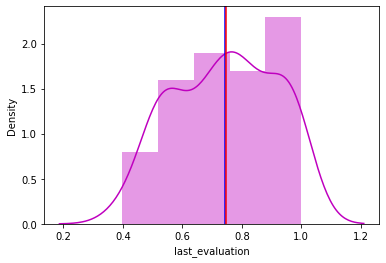

In [101]:
# Is my data normally distributed for last_evaluation column ?

sns.distplot(df_DataForPred.last_evaluation, color='m')
plt.axvline(df_DataForPred.last_evaluation.mean(), color='b')
plt.axvline(df_DataForPred.last_evaluation.median(), color='r')
plt.show()

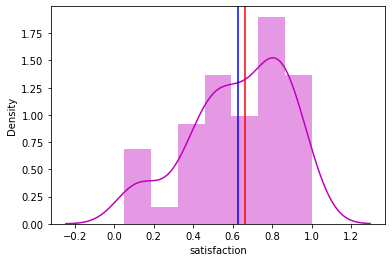

In [102]:
# Is my data normally distributed for satisfaction column ?

sns.distplot(df_DataForPred.satisfaction, color='m')
plt.axvline(df_DataForPred.satisfaction.mean(), color='b')
plt.axvline(df_DataForPred.satisfaction.median(), color='r')
plt.show()

In [103]:
# filling the missing values in "last_evaluation" by mean.
df_DataForPred.last_evaluation.fillna(df_DataForPred.last_evaluation.mean(), inplace=True)

# filling the missing values in "satisfaction" by mean.
df_DataForPred.satisfaction.fillna(df_DataForPred.satisfaction.mean(), inplace=True)

In [104]:
df_DataForPred.isnull().sum().sort_values(ascending=False)

avg_monthly_hrs    0
department         0
last_evaluation    0
n_projects         0
salary             0
satisfaction       0
tenure             0
employee_id        0
age                0
gender             0
marital_status     0
dtype: int64

In [105]:
# checking for duplicate data in the final dataset

df_DataForPred[df_DataForPred.duplicated()].count()

avg_monthly_hrs    0
department         0
last_evaluation    0
n_projects         0
salary             0
satisfaction       0
tenure             0
employee_id        0
age                0
gender             0
marital_status     0
dtype: int64

In [106]:
df_DataForPred.head()

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,tenure,employee_id,age,gender,marital_status
0,134,D00-IT,0.528841,2,low,0.400464,3.0,119045,27,Male,Unmarried
1,221,D00-PD,0.784561,2,low,0.759513,3.0,112223,23,Male,Unmarried
2,156,D00-SS,0.545183,2,medium,0.336457,3.0,103924,26,Male,Unmarried
3,133,D00-PR,0.744114,4,medium,0.832039,2.0,105922,52,Male,Married
4,135,D00-SS,0.454637,2,low,0.320723,5.0,103297,27,Male,Unmarried


---
<a name = Section12.2></a>
### **12.2 Data Encoding**
---

In [107]:
# Encode the data to fir our model

le = LabelEncoder()

df_DataForPred['gender'] = le.fit_transform(df_DataForPred['gender'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

df_DataForPred['marital_status'] = le.fit_transform(df_DataForPred['marital_status'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

df_DataForPred['salary'] = le.fit_transform(df_DataForPred['salary'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

df_DataForPred['department'] = le.fit_transform(df_DataForPred['department'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)


{'Female': 0, 'Male': 1}
{'Married': 0, 'Unmarried': 1}
{'high': 0, 'low': 1, 'medium': 2}
{'D00-AD': 0, 'D00-ENG': 1, 'D00-FN': 2, 'D00-IT': 3, 'D00-MN': 4, 'D00-MT': 5, 'D00-PD': 6, 'D00-PR': 7, 'D00-SP': 8, 'D00-SS': 9, 'D00-TP': 10}


In [108]:
X = df_DataForPred[['avg_monthly_hrs', 'last_evaluation', 'n_projects', 'salary', 'satisfaction', 'tenure', 'age', 'gender', 'marital_status', 'department']]
X.head()

,avg_monthly_hrs,last_evaluation,n_projects,salary,satisfaction,tenure,age,gender,marital_status,department
0,134,0.528841,2,1,0.400464,3.0,27,1,1,3
1,221,0.784561,2,1,0.759513,3.0,23,1,1,6
2,156,0.545183,2,2,0.336457,3.0,26,1,1,9
3,133,0.744114,4,2,0.832039,2.0,52,1,0,7
4,135,0.454637,2,1,0.320723,5.0,27,1,1,9


In [109]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   avg_monthly_hrs  100 non-null    int64  
 1   last_evaluation  100 non-null    float64
 2   n_projects       100 non-null    int64  
 3   salary           100 non-null    int64  
 4   satisfaction     100 non-null    float64
 5   tenure           100 non-null    object 
 6   age              100 non-null    int64  
 7   gender           100 non-null    int64  
 8   marital_status   100 non-null    int64  
 9   department       100 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 8.6+ KB


---
<a name = Section12.3></a>
### **12.3 Run the model through given data**
---

In [110]:
y_pred_unseenData = gbc_grid.predict(X)
y_pred_unseenData_probability = gbc_grid.predict_proba(X)
preds = y_pred_unseenData_probability[:,1]

print (y_pred_unseenData.shape, y_pred_unseenData_probability.shape, preds.shape)

(100,) (100, 2) (100,)


In [111]:
# adding status column to unseenData.csv

y_pred_df = pd.DataFrame(y_pred_unseenData, columns=['status'])
print(y_pred_df.shape)

In [112]:
# adding 'Probability to Leave' column to unseenData_probability.csv

y_pred_proba_df = pd.DataFrame(preds, columns=['Probability to Leave'])
print (y_pred_proba_df.shape) 

(100, 1) (100, 1)


In [113]:
print(y_pred_df.columns, y_pred_proba_df.columns)
y_pred_proba_df['Probability to Leave'] = y_pred_proba_df['Probability to Leave'].apply(lambda x: round(x,2))

Index(['status'], dtype='object') Index(['Probability to Leave'], dtype='object')


In [114]:
print(y_pred_df.head())

   status
0       0
1       0
2       0
3       1
4       0


In [115]:
print(y_pred_proba_df.head())

   Probability to Leave
0                  0.05
1                  0.03
2                  0.04
3                  0.95
4                  0.26


In [116]:
y_pred_df.status.value_counts()

0    71
1    29
Name: status, dtype: int64

---
<a name = Section12.4></a>
### **12.4 Publish the report**
---

In [117]:
empColumn = df_DataForPred[['employee_id']]
empColumn.shape

(100, 1)

In [118]:
df_final_publish = pd.concat([empColumn, y_pred_proba_df], axis=1)
df_final_publish.columns

Index(['employee_id', 'Probability to Leave'], dtype='object')

In [119]:
df_final_publish.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           100 non-null    int64  
 1   Probability to Leave  100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.3 KB


In [120]:
df_final_publish.head()

,employee_id,Probability to Leave
0,119045,0.05
1,112223,0.03
2,103924,0.04
3,105922,0.95
4,103297,0.26


In [121]:
df_final_publish.to_csv('1005_HR_ProbabilityData.csv', header=False, index=False)